# Contents
ML Applications in NLP
- Feature extraction (BoW, TF-IDF)
- Model Development: Training, testing
- Classification & Prediction
- Error Analysis

# Task 1: Sentiment Analysis in English
Sentiment analysis is a technique in Natural Language Processing (NLP) that aims to identify and categorize opinions expressed in a piece of text. It determines whether the sentiment behind a text is positive, negative, or neutral.

![](https://miro.medium.com/v2/resize:fit:594/1*fDnVCDLv3a8tyxuZEWIS3w.png)

## Dataset

https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset

In [ ]:
!pip install kaggle

# Download the dataset
!kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

# Unzip the downloaded dataset
!unzip sentiment-analysis-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset
License(s): CC0-1.0
sentiment-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment-analysis-dataset.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv',encoding='latin1')
test_df = pd.read_csv('test.csv',encoding='latin1')

print('Train data shape:', train_df.shape)
print('Test data shape:', test_df.shape)

Train data shape: (27481, 10)
Test data shape: (4815, 9)


In [ ]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


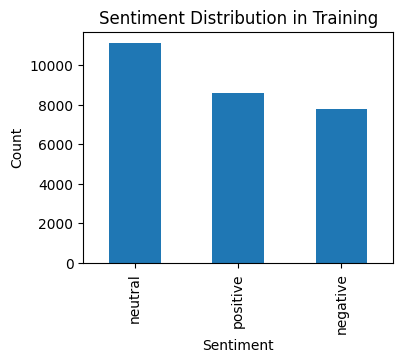

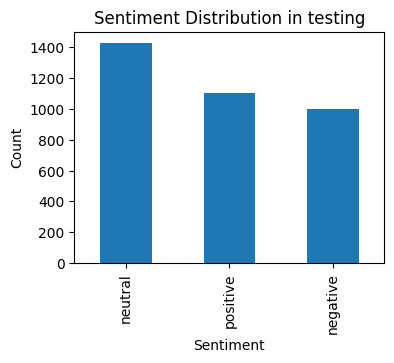

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = train_df['sentiment'].value_counts()

plt.figure(figsize=(4, 3))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution in Training')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sentiment_counts = test_df['sentiment'].value_counts()

plt.figure(figsize=(4, 3))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution in testing')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Let's look at some tweets

In [ ]:
positive_examples = train_df[train_df['sentiment'] == 'positive']['text'].sample(n=3).tolist()
negative_examples = train_df[train_df['sentiment'] == 'negative']['text'].sample(n=3).tolist()
neutral_examples = train_df[train_df['sentiment'] == 'neutral']['text'].sample(n=3).tolist()

print("Positive Examples:")
print("-"*20)
for i, example in enumerate(positive_examples):
  print(f'{i+1}. {example}')

print("\nNegative Examples:")
print("-"*20)
for i, example in enumerate(negative_examples):
  print(f'{i+1}. {example}')

print("\nNeutral Examples:")
print("-"*20)
for i, example in enumerate(neutral_examples):
  print(f'{i+1}. {example}')

Positive Examples:
--------------------
1. Coldstone with kayla and some fat guys, but she is all that matters
2.  Guess I`d better look out for a new best friend once those VIP tickets have been used! You won`t want me anymore!
3. liz just left  aww it was so good to see her.

Negative Examples:
--------------------
1.  i think  missed me tooo
2.  b/c you catnapped...cats always have weird dreams
3. Tired of hearing stories about everybody going to Ibiza...

Neutral Examples:
--------------------
1. hypervenilating cuz i just watched keith urban`s new video!!!   trying to calm down and im realizing how far away august 13 is!!!!
2. i am going to be staring at hello kitty`s face at 3-9
3. I mean i`m tired, and sooooo freakin in love with my .


## Preprocess the texts

In [ ]:
# Remove rows with empty text in train_df
train_df = train_df.dropna(subset=['text'])
train_df = train_df[train_df['text'].str.strip().astype(bool)]

# Remove rows with empty text in test_df
test_df = test_df.dropna(subset=['text'])
test_df = test_df[test_df['text'].str.strip().astype(bool)]

In [ ]:
import re

def clean_text(text):
  """Cleans a text string by removing URLs, mentions, hashtags, and special characters."""
  text = re.sub(r'http\S+', '', text)  # Remove URLs
  text = re.sub(r'@\S+', '', text)  # Remove mentions
  text = re.sub(r'#\S+', '', text)  # Remove hashtags
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = text.lower()  # Convert to lowercase
  return text


train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [ ]:
train_df[['text', 'cleaned_text']].head(10)

,text,cleaned_text
0,"I`d have responded, if I were going",id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the rel...
5,http://www.dothebouncy.com/smf - some shameles...,some shameless plugging for the best rangers...
6,2am feedings for the baby are fun when he is a...,2am feedings for the baby are fun when he is a...
7,Soooo high,soooo high
8,Both of you,both of you
9,Journey!? Wow... u just became cooler. hehe....,journey wow u just became cooler hehe is tha...


In [ ]:
test_df[['text', 'cleaned_text']].head(10)

,text,cleaned_text
0,Last session of the day http://twitpic.com/67ezh,last session of the day
1,Shanghai is also really exciting (precisely -...,shanghai is also really exciting precisely s...
2,"Recession hit Veronique Branquinho, she has to...",recession hit veronique branquinho she has to ...
3,happy bday!,happy bday
4,http://twitpic.com/4w75p - I like it!!,i like it
5,that`s great!! weee!! visitors!,thats great weee visitors
6,I THINK EVERYONE HATES ME ON HERE lol,i think everyone hates me on here lol
7,"soooooo wish i could, but im in school and my...",soooooo wish i could but im in school and mys...
8,and within a short time of the last clue all ...,and within a short time of the last clue all ...
9,What did you get? My day is alright.. haven`...,what did you get my day is alright havent do...


## Train a model to classify sentiment

### Word Embedding

A word embedding model *represents words as numbers* so that computers can process them. As computer only understand numbers.

![](https://datasciencedojo.com/wp-content/uploads/Embeddings.jpg)

#### 1. **Bag of Words (BoW)**
   - Represents text as a collection of words.
   $$ \text{BoW}[i] = \text{count of word } i \text{ in the document.} $$
   - Example:
     ```
     Text: "NLP is fun. NLP applications are diverse."
     Vocabulary: ["NLP", "is", "fun", "applications", "are", "diverse"]
     BoW Representation: [2, 1, 1, 1, 1, 1]
     ```

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# An example to show how CountVectorizer works
text = ["NLP is fun. NLP applications are diverse."]

vectorizer = CountVectorizer()
vectorizer.fit(text)

print('Vocabulary: ', vectorizer.vocabulary_)

vector = vectorizer.transform(text)
print('Shape of the Sparse Matrix: ', vector.shape)
print('Sparse Matrix: \n', vector.toarray())

Vocabulary:  {'nlp': 5, 'is': 4, 'fun': 3, 'applications': 0, 'are': 1, 'diverse': 2}
Shape of the Sparse Matrix:  (1, 6)
Sparse Matrix: 
 [[1 1 1 1 1 2]]


In [ ]:
# Another example on a list of sentences
text = ["NLP is fun.", "NLP applications are diverse."]
vectorizer = CountVectorizer()
vectorizer.fit(text)

print('Vocabulary: ', vectorizer.vocabulary_)

vector = vectorizer.transform(text)
print('Shape of the Sparse Matrix: ', vector.shape)
print('Sparse Matrix: \n', vector.toarray())

Vocabulary:  {'nlp': 5, 'is': 4, 'fun': 3, 'applications': 0, 'are': 1, 'diverse': 2}
Shape of the Sparse Matrix:  (2, 6)
Sparse Matrix: 
 [[0 0 0 1 1 1]
 [1 1 1 0 0 1]]


In [ ]:
# On our dataset
vectorizer_bow = CountVectorizer()
X_train = vectorizer_bow.fit_transform(train_df['cleaned_text'])
y_train = train_df['sentiment']

print("Text data shape:", train_df['cleaned_text'].shape)
print("After Word Embedding:", X_train.shape)

Text data shape: (27480,)
After Word Embedding: (27480, 28038)


#### Classification Model (ML)
We have a resulting *feature vector (X) with 28038 features*. Now we can apply any ML algorithm to classify them into *3 categories (Y)*, Positive, Neutral, and Negative.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model_bow_lr = LogisticRegression(max_iter=1000)
model_bow_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Test the model

- **Precision**: Measures the proportion of true positive predictions out of all positive predictions made by the model.

  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$

- **Recall (Sensitivity)**: Measures the proportion of true positive predictions out of all actual positive cases.

  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$

- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.

  $$
  \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$


# Performance Metrics for Classification

## Confusion Matrix (Actual vs Predicted Table)

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)     |

The confusion matrix helps summarize the performance of a classification model by showing the counts of:
- **True Positive (TP):** Correctly predicted positive cases.
- **True Negative (TN):** Correctly predicted negative cases.
- **False Positive (FP):** Incorrectly predicted as positive (type I error).
- **False Negative (FN):** Incorrectly predicted as negative (type II error).

---

**1. Accuracy**
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Accuracy measures the overall correctness of the model. It is the ratio of correctly predicted instances (both positive and negative) to the total instances.

Useful when the dataset is balanced, meaning the number of positive and negative samples is roughly the same.

---

**2. Precision**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
  
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on the accuracy of the positive predictions.

Crucial when the cost of false positives is high, e.g., in email spam detection, where marking important emails as spam (FP) is highly undesirable.

---

**3. Recall (Sensitivity)**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on capturing all true positives.
  
Important when the cost of false negatives is high, e.g., in medical diagnoses, where missing a disease (FN) could be critical.

---

**4. F1 Score**
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The F1 score is the harmonic mean of precision and recall, balancing the two metrics. It is especially useful when you need a single measure to evaluate a model on imbalanced datasets.

Helpful when the dataset is imbalanced, as it considers both false positives and false negatives, e.g., in fraud detection, where the minority class (fraudulent cases) is of primary interest.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Get the features using BoW which we have trained before (Word Embedding Model)
X_test = vectorizer_bow.transform(test_df['cleaned_text'])
y_test = test_df['sentiment']

print(X_test.shape, y_test.shape)

# Make predictions on the test set (Classification Model)
y_pred = model_bow_lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

(3534, 28038) (3534,)

Accuracy: 0.6943972835314092

Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.64      0.67      1001
     neutral       0.63      0.72      0.68      1430
    positive       0.79      0.70      0.74      1103

    accuracy                           0.69      3534
   macro avg       0.71      0.69      0.70      3534
weighted avg       0.70      0.69      0.70      3534



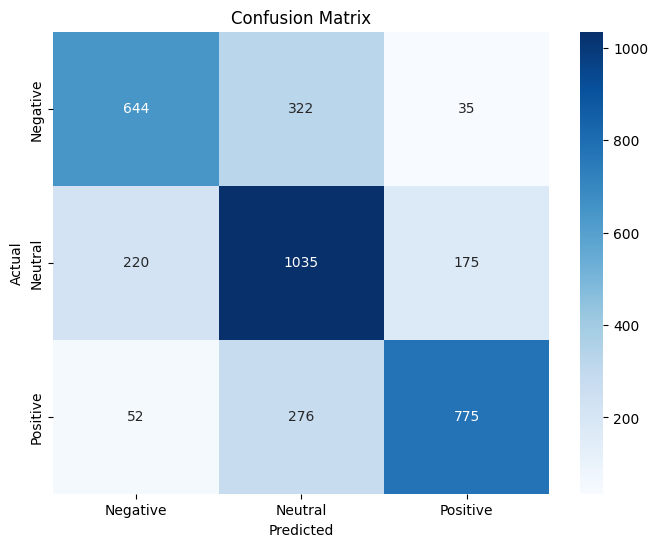

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are defined from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 2. **TF-IDF (Term Frequency - Inverse Document Frequency)**
   - Balances term frequency and rarity of terms.

   - **Term Frequency (TF)**
     $$
     TF = \frac{\text{Term count in document}}{\text{Total terms in document}}
     $$
     **Corpus: ["NLP is fun", "NLP applications are diverse", "Fun with NLP"]**
   
| Term          | Document 1 ("NLP is fun") | Document 2 ("NLP applications are diverse") | Document 3 ("Fun with NLP") |
|---------------|---------------------------|---------------------------------------------|-----------------------------|
| NLP           | $ \frac{1}{3} \approx 0.333 $       | $ \frac{1}{4} = 0.25 $                   | $ \frac{1}{3} \approx 0.333 $       |
| is            | $ \frac{1}{3} \approx 0.333 $       | $ \frac{0}{4} = 0 $                      | $ \frac{0}{3} = 0 $                 |
| fun           | $ \frac{1}{3} \approx 0.333 $       | $ \frac{0}{4} = 0 $                      | $ \frac{1}{3} \approx 0.333 $       |
| applications  | $ \frac{0}{3} = 0 $                 | $ \frac{1}{4} = 0.25 $                   | $ \frac{0}{3} = 0 $                 |
| are           | $ \frac{0}{3} = 0 $                 | $ \frac{1}{4} = 0.25 $                   | $ \frac{0}{3} = 0 $                 |
| diverse       | $ \frac{0}{3} = 0 $                 | $ \frac{1}{4} = 0.25 $                   | $ \frac{0}{3} = 0 $                 |
| with          | $ \frac{0}{3} = 0 $                 | $ \frac{0}{4} = 0 $                      | $ \frac{1}{3} \approx 0.333 $       |


   - **Inverse Document Frequency (IDF)**
     $$
     IDF = \log\left(\frac{\text{Total documents}}{1 + \text{Documents containing term}}\right)
     $$

| Term          | Documents Containing Term | IDF (Inverse Document Frequency) Value               |
|---------------|---------------------------|-------------------------|
| NLP           | 3                         | $ \log\left(\frac{3}{1+3}\right) \approx -0.124 $ |
| is            | 1                         | $ \log\left(\frac{3}{1+1}\right) \approx 0.176 $ |
| fun           | 2                         | $ \log\left(\frac{3}{1+2}\right) \approx 0 $     |
| applications  | 1                         | $ \log\left(\frac{3}{1+1}\right) \approx 0.176 $ |
| are           | 1                         | $ \log\left(\frac{3}{1+1}\right) \approx 0.176 $ |
| diverse       | 1                         | $ \log\left(\frac{3}{1+1}\right) \approx 0.176 $ |
| with          | 1                         | $ \log\left(\frac{3}{1+1}\right) \approx 0.176 $ |


   - **TF-IDF Calculation**
     $$
     TF-IDF = TF \times IDF
     $$

| Term          | ---- Document 1 ----                | ---- Document 2 ----                | ---- Document 3 ----                |
|---------------|--------------------------|---------------------------|--------------------------|
| NLP           | $ 0.333 \times -0.124 = -0.041 $ | $ 0.25 \times -0.124 = -0.031 $  | $ 0.333 \times -0.124 = -0.041 $ |
| is            | $ 0.333 \times 0.176 = 0.059 $  | $ 0 \times 0.176 = 0 $          | $ 0 \times 0.176 = 0 $           |
| fun           | $ 0.333 \times 0 = 0 $          | $ 0 \times 0 = 0 $              | $ 0.333 \times 0 = 0 $          |
| applications  | $ 0 \times 0.176 = 0 $          | $ 0.25 \times 0.176 = 0.044 $  | $ 0 \times 0.176 = 0 $          |
| are           | $ 0 \times 0.176 = 0 $          | $ 0.25 \times 0.176 = 0.044 $  | $ 0 \times 0.176 = 0 $          |
| diverse       | $ 0 \times 0.176 = 0 $          | $ 0.25 \times 0.176 = 0.044 $  | $ 0 \times 0.176 = 0 $          |
| with          | $ 0 \times 0.176 = 0 $          | $ 0 \times 0.176 = 0 $          | $ 0.333 \times 0.176 = 0.059 $  |


In [ ]:
# Use tf-idf on our dataset
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X_train = vectorizer_tfidf.fit_transform(train_df['cleaned_text'])
y_train = train_df['sentiment']

print("Text data shape:", train_df['cleaned_text'].shape)
print("After Word Embedding:", X_train.shape)


Text data shape: (27480,)
After Word Embedding: (27480, 28038)


#### Classification Model (ML)

In [ ]:
# Train a logistic regression model
model_tfidf_lr = LogisticRegression(max_iter=1000)
model_tfidf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Test the model

In [ ]:
# Get the features using tf-idf which we have trained before (Word Embedding Model)
X_test = vectorizer_tfidf.transform(test_df['cleaned_text'])
y_test = test_df['sentiment']

print(X_test.shape, y_test.shape)

# Make predictions on the test set (Classification Model)
y_pred = model_tfidf_lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

(3534, 28038) (3534,)

Accuracy: 0.7059988681380871

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.64      0.68      1001
     neutral       0.64      0.75      0.69      1430
    positive       0.81      0.71      0.75      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534



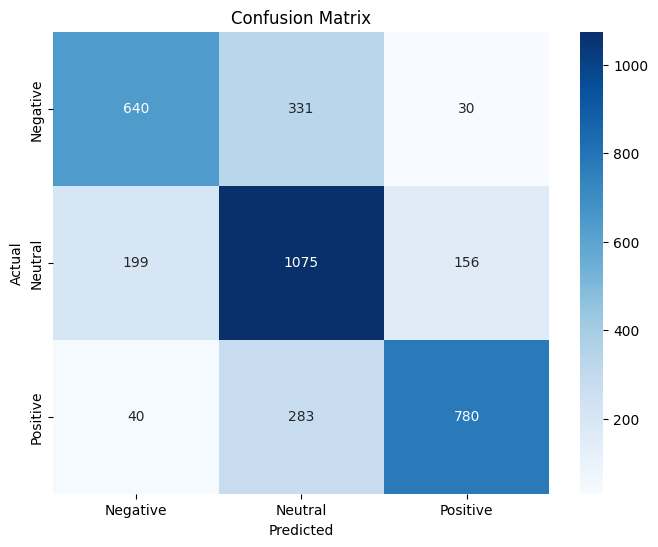

In [ ]:
# Assuming y_test and y_pred are defined from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### BoW vs TF-IDF
| **Aspect**            | **Bag of Words (BoW)**                                     | **TF-IDF (Term Frequency - Inverse Document Frequency)**               |
|-----------------------|----------------------------------------------------------|------------------------------------------------------------------------|
| **Definition**        | Counts the frequency of words in each document.           | Combines term frequency with inverse document frequency to weigh terms. |
| **Weighting**         | All terms are equally important; uses raw counts.          | Weighs terms based on importance; downweighs common terms (e.g., \"the\"). |
| **Handling Common Terms** | Common terms (e.g., \"is\") dominate representation.       | Reduces the impact of common terms by assigning lower weights.         |
| **Focus**             | Captures word frequency within a document.                 | Balances word importance within a document and across the entire corpus. |
| **When to Use**         | When term frequency alone is meaningful and computational efficiency is critical. | When understanding the importance of terms across the corpus is required. |
| **Use Case**          | Suitable for basic text classification tasks (e.g., spam detection). | Ideal for information retrieval and relevance tasks (e.g., search engines). |
| **Example**           | In a corpus with \"NLP is fun\" and \"Fun with NLP\": <br> BoW will represent both sentences with equal  weight for \"NLP\" and \"is\"<br> regardless of their relevance across documents. | TF-IDF will weigh \"NLP\" higher <br> because it is significant to the corpus,  <br> but reduce the weight of \"is\" due to its commonality. |
| **Simplicity**        | Easier to implement and interpret.                         | More complex due to logarithmic scaling and corpus dependency.         |
| **Interpretability**    | Easier to interpret due to direct term counts.              | Slightly harder to interpret due to logarithmic weighting.              |
| **Sensitivity to Corpus Size** | Less sensitive to the size of the corpus.               | Highly sensitive; IDF values change with the size and diversity of the corpus. |


## Test on your own input

In [ ]:
text_input = "This is a beautiful sunny day, but I'm feeling sad."  #@param {type:"string"}

# Clean the input text
cleaned_input = clean_text(text_input)

# Transform the input text using the same vectorizer (Word Embedding Model)
input_vector = vectorizer_tfidf.transform([cleaned_input])

# Predict the sentiment (Classification Model)
predicted_sentiment = model_tfidf_lr.predict(input_vector)[0]

print(f"The predicted sentiment for the input text is: {predicted_sentiment}")

The predicted sentiment for the input text is: negative


## Homework Tasks:
   - Apply different ML models with BoW and Tf-idf word embeddings and compare the results.
   - Perform the same analysis on a [Bangla sentiment analysis dataset](https://www.kaggle.com/datasets/sushmit0109/eblict-bangla-sentiment-analysis-dataset).
        
        ``` Here classes are, SN: Strongly Negative, WN: Weakly Negative, NU: Neutral, WP: Weakly Positive, SP: Stronly Positive```
   - Apply the same techniques to an [emotion detection Bangla dataset](https://github.com/FarhanSadaf/Emotion-Detection-Dataset).
